In [1]:
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2
%matplotlib inline

50


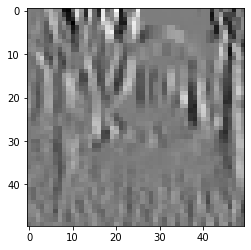

In [15]:
training_image_1 = cv2.imread('folder_filled/train_images/train/1.jpg')
training_image_1 = cv2.resize(training_image_1, (50, 50))
training_image_1 = cv2.cvtColor(training_image_1, cv2.COLOR_BGR2GRAY)
edges_prewitt_vertical = prewitt_v(training_image_1)
print(len(edges_prewitt_vertical))
plt.imshow(edges_prewitt_vertical, cmap='gray')

In [4]:
def get_edges_prewitt_vertical(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges_prewitt_vertical = prewitt_v(image)
    return edges_prewitt_vertical

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
edges_prewitt_vertical.flatten().shape

(2500,)

In [26]:
df = pd.DataFrame(edges_prewitt_vertical.flatten(), columns=['edges_prewitt_vertical'])
df.head()

,edges_prewitt_vertical
0,9.150327e-03
1,-2.775558e-17
2,-3.921569e-03
3,-2.875817e-02
4,2.261438e-01


In [27]:
new_list = []
for i in os.listdir('folder_filled/train_images/train'):
    image = cv2.imread('folder_filled/train_images/train/'+i)
    image = cv2.resize(image, (50, 50))
    new_list.append(get_edges_prewitt_vertical(image))

In [42]:
df = pd.DataFrame(new_list[0].reshape(1,-1))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
for i in range(1, len(new_list)):
    df = df.append(pd.DataFrame(new_list[i].reshape(1,-1)))

/var/folders/hx/zshnl3dj6w33t23ztn0vvq6h0000gn/T/ipykernel_33430/1956903642.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(new_list[i].reshape(1,-1)))
/var/folders/hx/zshnl3dj6w33t23ztn0vvq6h0000gn/T/ipykernel_33430/1956903642.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(new_list[i].reshape(1,-1)))
/var/folders/hx/zshnl3dj6w33t23ztn0vvq6h0000gn/T/ipykernel_33430/1956903642.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(new_list[i].reshape(1,-1)))
/var/folders/hx/zshnl3dj6w33t23ztn0vvq6h0000gn/T/ipykernel_33430/1956903642.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [45]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.010458,0.018301,0.015686,0.013072,0.009150,0.007843,-0.001307,0.002614,0.013072,0.007843,...,0.092810,0.041830,-0.010458,0.036601,0.278431,0.215686,-0.032680,0.019608,-0.041830,-0.065359
0,0.065359,-0.128105,-0.016993,0.047059,0.013072,0.005229,-0.044444,0.230065,0.171242,0.044444,...,-0.054902,0.014379,0.175163,0.271895,0.198693,-0.060131,-0.159477,0.084967,0.159477,0.031373
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [47]:
scaled_data = scaler.transform(df)

In [48]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [49]:
x_pca.shape

(8400, 2)

In [52]:
df_train = pd.read_csv('folder_filled/train.csv')
df_train.drop(['toilets','image_id','address','city'], axis=1, inplace=True)
df_train.head()

,index,rooms,retail_price,sqft
0,5832,2.0,299000,1295.0
1,5584,3.0,299000,1566.0
2,9408,5.0,499990,3068.0
3,4644,4.0,849900,2230.0
4,5739,3.0,333490,1898.0


In [61]:
df_pca = pd.DataFrame(x_pca, columns=['pca_1','pca_2'])
df_pca.head()

,pca_1,pca_2
0,-3.900485,-0.598334
1,-3.037692,-1.515145
2,-3.892712,1.490092
3,0.077553,-0.060373
4,2.466619,1.367542


In [62]:
df_train = pd.concat([df_train, df_pca], axis=1)

In [64]:
df_train.dropna(inplace=True)

In [65]:
df_train.head()

,index,rooms,retail_price,sqft,pca_1,pca_2
0,5832.0,2.0,299000.0,1295.0,-3.900485,-0.598334
1,5584.0,3.0,299000.0,1566.0,-3.037692,-1.515145
2,9408.0,5.0,499990.0,3068.0,-3.892712,1.490092
3,4644.0,4.0,849900.0,2230.0,0.077553,-0.060373
4,5739.0,3.0,333490.0,1898.0,2.466619,1.367542


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df_train.drop('retail_price', axis=1)
y = df_train['retail_price']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError


In [71]:
def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns)
    x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns)
    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(X_train, X_test)

In [72]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
model = build_model_using_sequential()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-01-22 22:43:22.777834: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-22 22:43:22.778142: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [75]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
 1/71 [..............................] - ETA: 27s - loss: 155.8144 - mean_squared_logarithmic_error: 155.8144

2023-01-22 22:45:09.340329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 2s 16ms/step - loss: 20.2698 - mean_squared_logarithmic_error: 20.1539 - val_loss: 3.0510 - val_mean_squared_logarithmic_error: 3.0483
Epoch 2/10
 1/71 [..............................] - ETA: 0s - loss: 2.5440 - mean_squared_logarithmic_error: 2.5440

2023-01-22 22:45:10.520894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 10ms/step - loss: 1.6447 - mean_squared_logarithmic_error: 1.6369 - val_loss: 0.7966 - val_mean_squared_logarithmic_error: 0.7957
Epoch 3/10
71/71 [==============================] - 1s 10ms/step - loss: 0.5475 - mean_squared_logarithmic_error: 0.5464 - val_loss: 0.3762 - val_mean_squared_logarithmic_error: 0.3760
Epoch 4/10
71/71 [==============================] - 1s 9ms/step - loss: 0.3183 - mean_squared_logarithmic_error: 0.3173 - val_loss: 0.2783 - val_mean_squared_logarithmic_error: 0.2785
Epoch 5/10
71/71 [==============================] - 1s 10ms/step - loss: 0.2615 - mean_squared_logarithmic_error: 0.2612 - val_loss: 0.2559 - val_mean_squared_logarithmic_error: 0.2563
Epoch 6/10
71/71 [==============================] - 1s 11ms/step - loss: 0.2434 - mean_squared_logarithmic_error: 0.2437 - val_loss: 0.2446 - val_mean_squared_logarithmic_error: 0.2451
Epoch 7/10
71/71 [==============================] - 1s 10ms/step - loss: 0.2374 - mean_

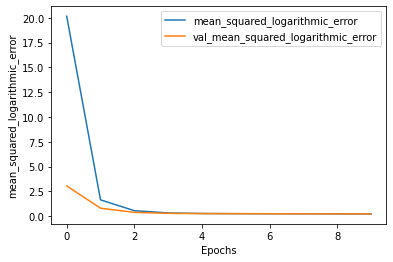

In [76]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [78]:
X_test['prediction'] = model.predict(x_test_scaled)

76/76 [==============================] - 0s 3ms/step


In [79]:
X_test.head()

,index,rooms,sqft,pca_1,pca_2,prediction
3655,1707.0,4.0,1794.0,-0.422372,-4.858401,551455.93750
994,4066.0,3.0,1170.0,2.970049,1.454619,350903.90625
4639,5066.0,3.0,1875.0,0.232499,0.571190,405792.84375
1292,11727.0,2.0,1218.0,1.303430,-1.995857,414608.12500
420,11410.0,2.0,827.0,-1.010659,-4.739472,454602.09375


<AxesSubplot:ylabel='Frequency'>

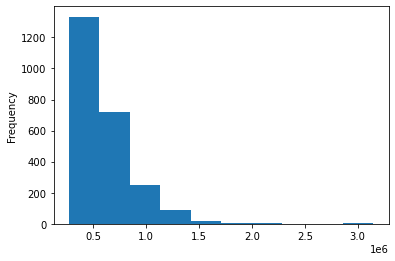